## Gunshot Example vs Non Gunshot Example
gunshot example link: https://www.youtube.com/watch?v=-gPM1IQBHkc

non gunshot example link: https://www.youtube.com/watch?v=HMp3VHakVKw

In [2]:
cd ../dataprocessing

/usr/local/google/home/carverforbes/activity-recognition/location/lbs/activity/audioset/dataprocessing


In [35]:
# import statements
import audio_processing as ap

import functools
import os
import sys
from absl import logging

import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import librosa
from librosa.display import specshow, waveplot

In [4]:
# set logging to print logging.INFO logs
logging.set_verbosity(logging.INFO)

In [5]:
# arguments for audio_processing
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
filename = 'visualize_features'
labels = ['Gunshot, gunfire']
features_to_extract = ['chroma_stft',
                       'chroma_cqt',
                       'chroma_cens',
                       'melspectrogram',
                       'mfcc',
                       'rms',
                       'spectral_centroid',
                       'spectral_bandwidth',
                       'spectral_contrast',
                       'spectral_flatness',
                       'spectral_rolloff',
                       'poly_features',
                       'tonnetz',
                       'zero_crossing_rate'
]

In [ ]:
# Import the dataset
df = ap.output_df(src_dir, dest_dir, filename, labels, features_to_extract, redo=True)

In [7]:
df.head()

,label,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,spectral_rolloff,poly_features,tonnetz,zero_crossing_rate
0,1,"[[0.0, 0.0, 0.0, 0.0, 0.7843553, 0.54307216, 0...","[[0.09258332569389338, 0.2928190467568291, 0.5...","[[0.22369786432146194, 0.2272912620778781, 0.2...","[[0.0, 0.0, 0.0, 0.0, 0.001610992, 0.25047067,...","[[-657.3855, -657.3855, -657.3855, -657.3855, ...","[[0.0, 0.0, 0.0, 0.0, 0.0046505095, 0.03854910...","[[0.0, 0.0, 0.0, 0.0, 1878.9022973124986, 2177...","[[0.0, 0.0, 0.0, 0.0, 2425.0846064312564, 2524...","[[10.014410241454293, 10.014410241454293, 10.0...","[[1.0000007, 1.0000007, 1.0000007, 1.0000007, ...","[[0.0, 0.0, 0.0, 0.0, 4812.6708984375, 5297.16...","[[0.0, 0.0, 0.0, 0.0, -1.6768991706865934e-06,...","[[-0.281025725903453, -0.13740358596365224, -0...","[[0.053877551020408164, 0.05587301587301587, 0..."
1,0,"[[0.23178951, 0.2400971, 0.19522238, 0.3074413...","[[0.4334480135195419, 0.5997544031182239, 0.36...","[[0.2991746992028136, 0.303567161079119, 0.307...","[[0.019797776, 0.017651457, 0.014519618, 0.046...","[[-393.5102, -358.7149, -305.9014, -293.03116,...","[[0.024667114, 0.03652823, 0.043979503, 0.0506...","[[635.7251720126577, 696.8686127197602, 696.08...","[[1213.1023466163983, 1116.8624170431447, 945....","[[13.592140412518678, 18.610782971207385, 17.3...","[[0.00010860667, 0.0003208257, 0.0001308785, 0...","[[764.4287109375, 861.328125, 958.2275390625, ...","[[-8.540768539078036e-05, -8.97025585974571e-0...","[[-0.047856158302314156, 0.016290520106443725,...","[[0.020045351473922904, 0.02145124716553288, 0..."


In [8]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [22]:
def plot_feature(feature):
    frames = range(len(feature))
    t = librosa.frames_to_time(frames)
    normalized_feature = normalize(feature)
    plt.plot(t, feature, color='r')

In [23]:
def view_chroma_stft(feature):
    frames = range(len(feature))
    t = librosa.frames_to_time(frames)
    normalized_feature = normalize(feature)
    plt.plot(t, feature, color='r')

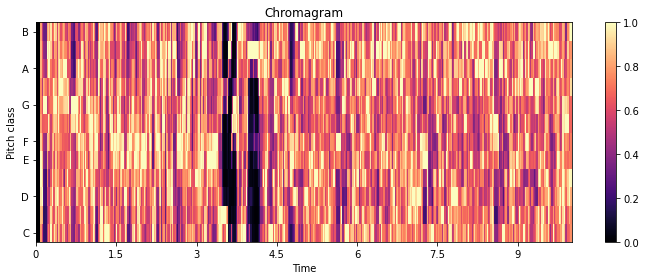

In [24]:
# gunshot chroma_sfft
chroma = df['chroma_stft'][0]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

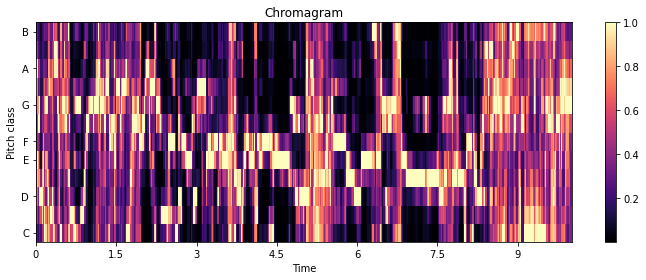

In [25]:
# non gunshot chroma_sfft
chroma = df['chroma_stft'][1]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

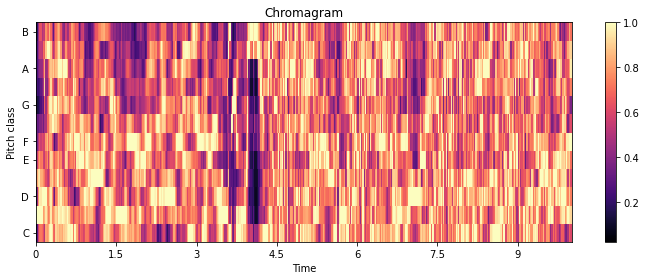

In [26]:
# gunshot chroma_cqt
chroma = df['chroma_cqt'][0]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

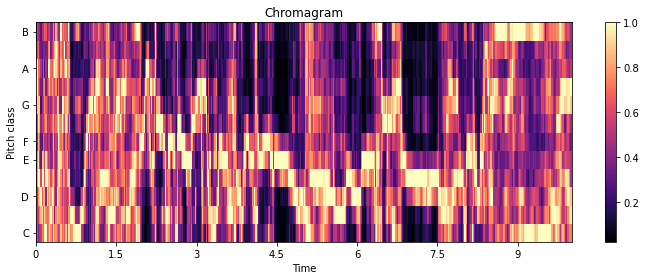

In [27]:
# non gunshot chroma_cqt
chroma = df['chroma_cqt'][1]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

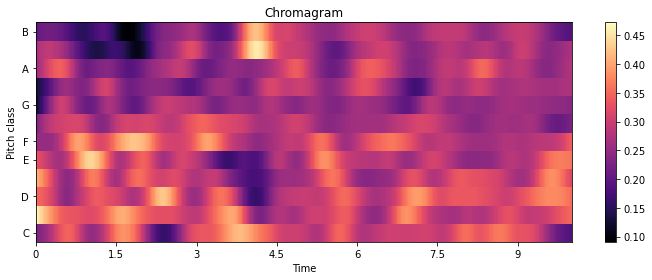

In [28]:
# gunshot chroma_cens
chroma = df['chroma_cens'][0]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

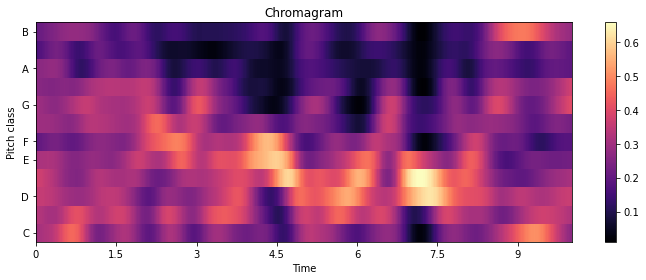

In [29]:
# non gunshot chroma_cens
chroma = df['chroma_cens'][1]
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

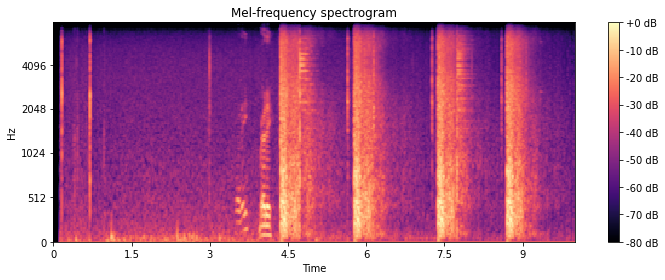

In [30]:
# gunshot melspectrogram
plt.figure(figsize=(10, 4))
S = df['melspectrogram'][0]
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

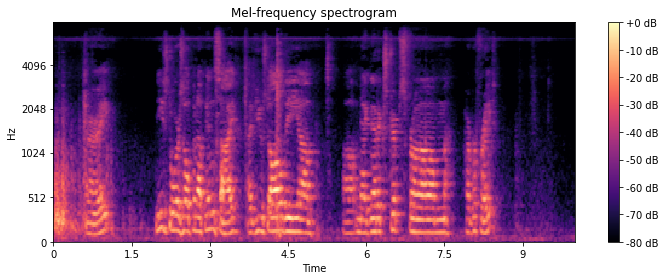

In [31]:
# non gunshot melspectrogram
plt.figure(figsize=(10, 4))
S = df['melspectrogram'][1]
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel',
                         fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

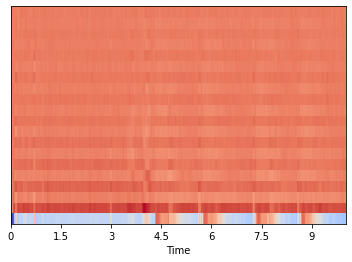

In [32]:
# gunshot mfcc
# view_spectral_centroid(df['mfcc'][0][0])
librosa.display.specshow(df['mfcc'][0], x_axis='time')

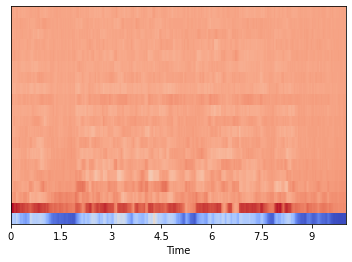

In [33]:
# non gunshot mfcc
# view_spectral_centroid(df['mfcc'][1][0])
librosa.display.specshow(df['mfcc'][1], x_axis='time')

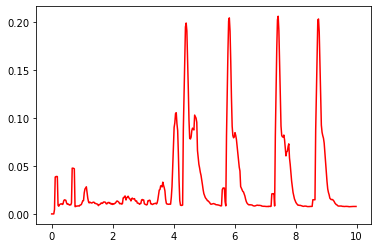

In [52]:
# gunshot rms
rms = df['rms'][0]
plot_feature(rms[0])

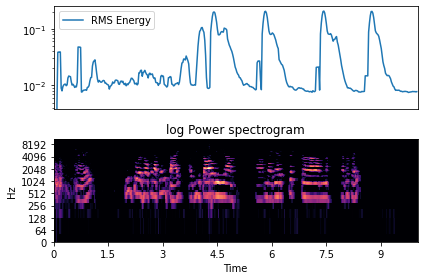

In [37]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

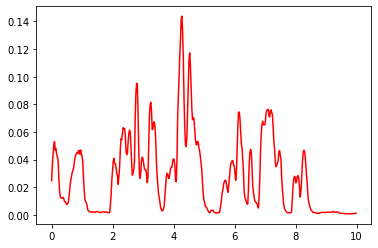

In [38]:
# non gunshot rms
rms = df['rms'][1]
plot_feature(df['rms'][1][0])

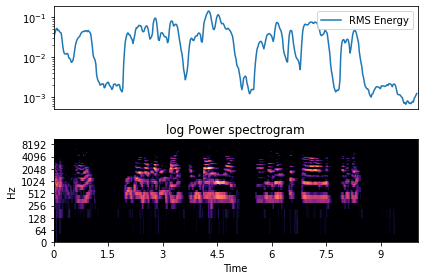

In [39]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

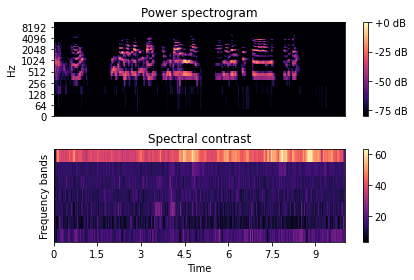

In [40]:
# gunshot spectral_contrast
contrast = df['spectral_contrast'][0]
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2)
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()

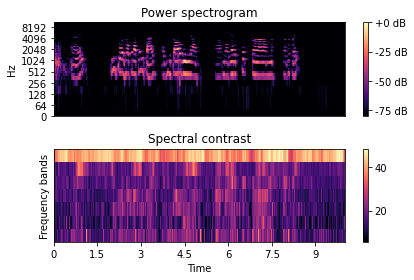

In [41]:
# non gunshot spectral_contrast

contrast = df['spectral_contrast'][1]
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2)
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()

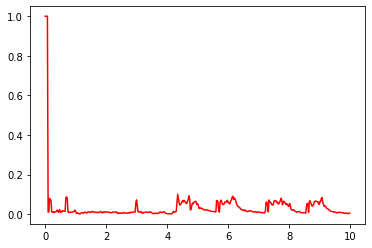

In [42]:
# gunshot spectral_flatness
plot_feature(df['spectral_flatness'][0][0])

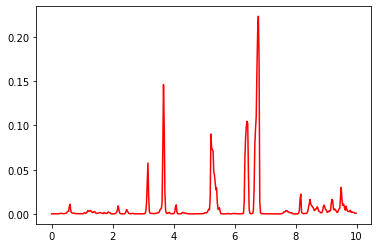

In [43]:
# non gunshot spectral_flatness
plot_feature(df['spectral_flatness'][1][0])

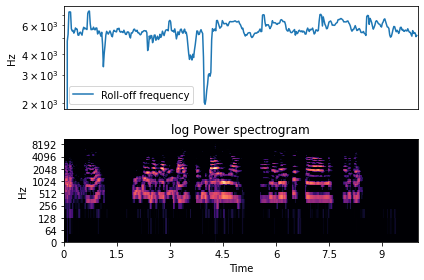

In [44]:
# gunshot spectral_rolloff
rolloff = df['spectral_rolloff'][0]

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

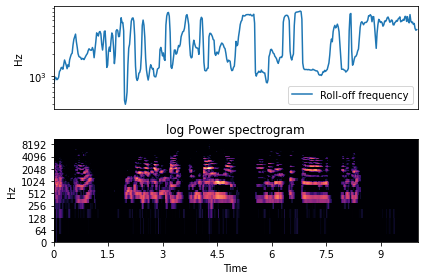

In [45]:
# non gunshot spectral_rolloff
rolloff = df['spectral_rolloff'][1]

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

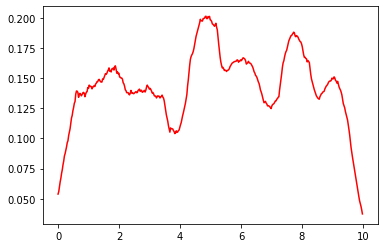

In [46]:
# gunshot zero_crossing_rate
plot_feature(df['zero_crossing_rate'][0][0])

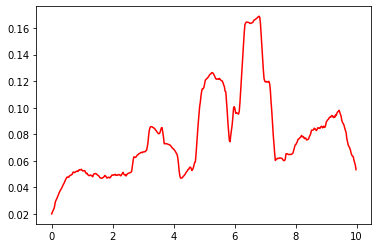

In [47]:
# non gunshot zero_crossing_rate
plot_feature(df['zero_crossing_rate'][1][0])

In [48]:
print('chroma_stft')
print('number of elements per subarray', df['chroma_stft'][0][0].size)
print('total number of elements', df['chroma_stft'][0].size)
print("number of subarrays", len(df['chroma_stft'][0]), '\n')

print('chroma_cqt')
print('number of elements per subarray', df['chroma_cqt'][0][0].size)
print('total number of elements', df['chroma_cqt'][0].size)
print("number of subarrays", len(df['chroma_cqt'][0]), '\n')

print('chroma_cens')
print('number of elements per subarray', df['chroma_cens'][0][0].size)
print('total number of elements', df['chroma_cens'][0].size)
print("number of subarrays", len(df['chroma_cens'][0]), '\n')

print('melspectrogram')
print('number of elements per subarray', df['melspectrogram'][0][0].size)
print('total number of elements', df['melspectrogram'][0].size)
print("number of subarrays", len(df['melspectrogram'][0]), '\n')

print('mfcc')
print('number of elements per subarray', df['mfcc'][0][0].size)
print('total number of elements', df['mfcc'][0].size)
print("number of subarrays", len(df['mfcc'][0]), '\n')

print('rms')
print('number of elements per subarray', df['rms'][0][0].size)
print('total number of elements', df['rms'][0].size)
print("number of subarrays", len(df['rms'][0]), '\n')

print('spectral_centroid')
print('number of elements per subarray', df['spectral_centroid'][0][0].size)
print('total number of elements', df['spectral_centroid'][0].size)
print("number of subarrays", len(df['spectral_centroid'][0]), '\n')

print('spectral_bandwidth')
print('number of elements per subarray', df['spectral_bandwidth'][0][0].size)
print('total number of elements', df['spectral_bandwidth'][0].size)
print("number of subarrays", len(df['spectral_bandwidth'][0]), '\n')

print('spectral_contrast')
print('number of elements per subarray', df['spectral_contrast'][0][0].size)
print('total number of elements', df['spectral_contrast'][0].size)
print("number of subarrays", len(df['spectral_contrast'][0]), '\n')

print('spectral_flatness')
print('number of elements per subarray', df['spectral_flatness'][0][0].size)
print('total number of elements', df['spectral_flatness'][0].size)
print("number of subarrays", len(df['spectral_flatness'][0]), '\n')

print('spectral_rolloff')
print('number of elements per subarray', df['spectral_rolloff'][0][0].size)
print('total number of elements', df['spectral_rolloff'][0].size)
print("number of subarrays", len(df['spectral_rolloff'][0]), '\n')

print('poly_features')
print('number of elements per subarray', df['poly_features'][0][0].size)
print('total number of elements', df['poly_features'][0].size)
print("number of subarrays", len(df['poly_features'][0]), '\n')

print('tonnetz')
print('number of elements per subarray', df['tonnetz'][0][0].size)
print('total number of elements', df['tonnetz'][0].size)
print("number of subarrays", len(df['tonnetz'][0]), '\n')

print('zero_crossing_rate')
print('number of elements per subarray', df['zero_crossing_rate'][0][0].size)
print('total number of elements', df['zero_crossing_rate'][0].size)
print("number of subarrays", len(df['zero_crossing_rate'][0]), '\n')

chroma_stft
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

chroma_cqt
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

chroma_cens
number of elements per subarray 431
total number of elements 5172
number of subarrays 12 

melspectrogram
number of elements per subarray 431
total number of elements 55168
number of subarrays 128 

mfcc
number of elements per subarray 431
total number of elements 8620
number of subarrays 20 

rms
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_centroid
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_bandwidth
number of elements per subarray 431
total number of elements 431
number of subarrays 1 

spectral_contrast
number of elements per subarray 431
total number of elements 3017
number of subarrays 7 

spectral_flatness
number of elements per subarray 431
total number of el